In [2]:
# scipy : svd ( singular value decomposition )
import numpy as np
from scipy import linalg
A=np.array([[1,2,3],[4,5,6]])
# 비 정방행렬에 대한 특이행렬분해
A

array([[1, 2, 3],
       [4, 5, 6]])

In [3]:
M,N=A.shape
M,N

(2, 3)

In [8]:
print(U)
print(s)
print(Vh) 

[[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]]
[9.508032   0.77286964]
[[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]]


In [10]:
-0.3863177*-0.92236578+(-0.92236578)*0.3863177

0.0

In [5]:
# 고유값 분해를 하는 이유 
U,s,Vh=linalg.svd(A) # 행의 공분산에 대한 특징, 고유치, 열에 대한 특징
Sig=linalg.diagsvd(s,M,N)
Sig

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [7]:
Vh # 3x3

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [ 0.80596391,  0.11238241, -0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [6]:
U.dot(Sig.dot(Vh)) # 원래 데이터로 복원
# 행렬곱은 내적인데 

array([[1., 2., 3.],
       [4., 5., 6.]])

In [13]:
# 차원축소 -> 특징추출 : 노이즈를 없애고 다중공선성을 분
# PCA : 정상적인 데이터인 경우 사용
# TruncatedSVD 희소행렬일 경우에 사용
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)
X_dense=np.random.rand(100,100)
X_dense[:,2*np.arange(50)]=0 # 0부터 짞수 인덱스를 0으로

print(X_dense)
X=csr_matrix(X_dense) # Compressed Sparse Row matrix

# PCA에서 특징을 뽑을 때도 n_components 사용
# 특징을 추출하는 TruncatedSVD (희소행렬로부터)
# 마트에서 물품 구매할 때
# 텍스트에서 단어를 이용해서 문장이나 책을 표현할 때(DTM,TDM)
svd=TruncatedSVD(n_components=5,n_iter=7,random_state=42)
svd.fit(X)
print('분산설명',svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)


[[0.         0.71518937 0.         ... 0.02010755 0.         0.00469548]
 [0.         0.27000797 0.         ... 0.25435648 0.         0.43441663]
 [0.         0.69634349 0.         ... 0.86219152 0.         0.96083466]
 ...
 [0.         0.26867428 0.         ... 0.5736796  0.         0.22519844]
 [0.         0.73882539 0.         ... 0.94836806 0.         0.1419334 ]
 [0.         0.19701397 0.         ... 0.75842952 0.         0.81357508]]
분산설명 [0.01570766 0.05122679 0.04998062 0.04795064 0.04539933]
0.21026503465070345
[35.24105443  4.5981613   4.54200434  4.44866153  4.32887456]


In [14]:
from sklearn import cluster,datasets
import seaborn as sns
iris=datasets.load_iris()
X=iris.data[:,:2]
y_iris=iris.target

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
def plot_kmeans(kmeans,X,n_clusters=4,rseed=0,ax=None):
  labels=kmeans.fit_predict(X)
  ax=ax or plt.gca()
  ax.axis('equal')
  ax.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis',zorder=2)
  centers=kmeans.cluster_centers_ # k개의 중심으로 그룹
  radii=[cdist(X[labels==i],[center]).max() # Compute distance
  for i,center in enumerate(centers)] # 반지름 결정
  for c,r in zip(centers,radii):
    ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',ec='#FF0000',lw=3,alpha=0.5,zorder=1))
  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


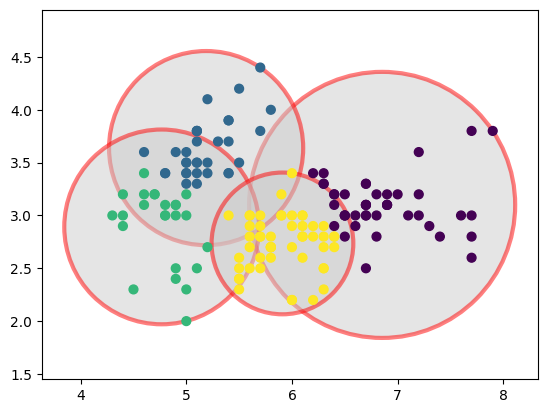

In [19]:
kmeans=KMeans(n_clusters=4,random_state=0)
plot_kmeans(kmeans,X)

In [22]:
# 양자 벡터화
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import numpy as np
n_colors=64

china=load_sample_image('china.jpg')
china=np.array(china,dtype=np.float64)/255 
# 부동소수점 표현 하기 위해서 float64로 데이터 타입 변환 
# 255로 나눈이유: 이미지 정규화
# 이미지는 기본적으로 3차원
# 동영상은 4차원 
w,h,d=original_shape = tuple(china.shape)
print(w,h,d)
image_array=np.reshape(china,(w*h,d)) # 컬러값을 데이터로
t0=time()
image_array_sample=shuffle(image_array,random_state=0)[:1000]
# fit 시간 단축
kmeans=KMeans(n_clusters=n_colors,random_state=0).fit(image_array_sample)
# 64개의 그룹(비슷한 컬러값의 모임)
# 각 그룹마다 center가 생김 : 대표 컬러값으로 재표현
# 사이즈도 줄어듦 => 이미지를 label로 표현
# jpg 이미지는 팔레트, 이미지를 전송 할 때 헤더에 팔레트를 전송하고
# 이미지에 해당하는 부분에는 팔레트 번호를 전
print('done in %0.3fs.' % (time()-t0))

427 640 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


done in 1.198s.


In [23]:
t0=time()
labels=kmeans.predict(image_array) # w*h
print('done in %0.3fs.'%(time()-t0))

done in 0.064s.


In [24]:
def recreate_image(codebook,labels,w,h): # 이미지 복원
  d=codebook.shape[1] # 컬러 팔레트 - 중심값 64x3
  image=np.zeros((w,h,d)) # 원래 이미지 사이즈 공간을 확보하고
  label_idx=0
  for i in range(w):
    for j in range(h):
      image[i][j]=codebook[labels[label_idx]]
      label_idx+=1
  return image

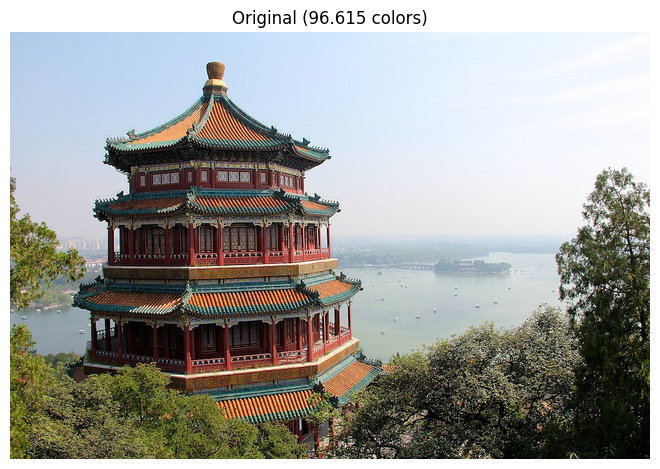

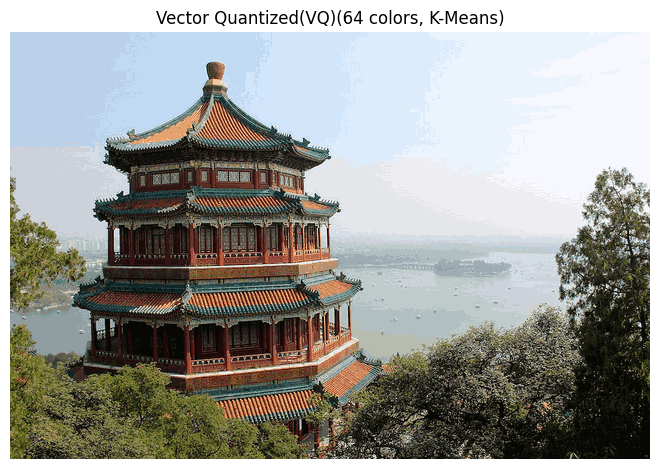

In [26]:
# 팔레트에 대표컬러를 준비하고
# 대표컬러를 이용해서 비슷한 컬러를 표현
plt.figure(1)
plt.clf()
ax=plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original (96.615 colors)') # 원본 이미지
plt.imshow(china)
plt.figure(2)
plt.clf()
ax=plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Vector Quantized(VQ)(64 colors, K-Means)') # 벡터화된 이미지
plt.imshow(recreate_image(kmeans.cluster_centers_,labels,w,h))

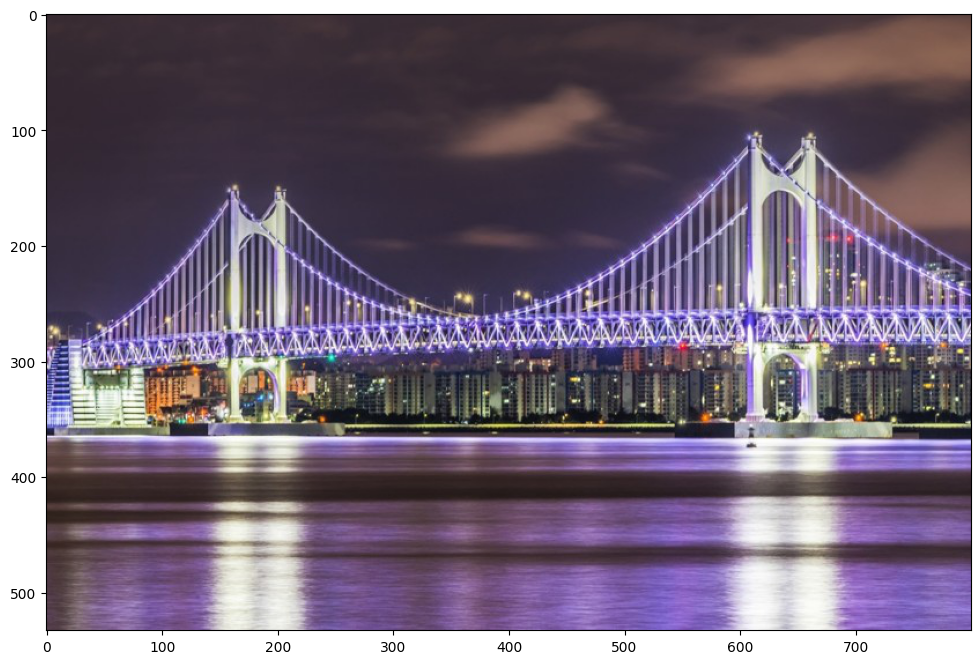

In [43]:
from sklearn import cluster
image=plt.imread('/content/drive/MyDrive/daejeon_1/YHH07697.jpg')
plt.figure(figsize=(15,8))
plt.imshow(image)

In [44]:
x,y,z=image.shape
image=np.array(image,dtype=np.float64)/255
image_2d=image.reshape(x*y,z)
image_2d.shape

(426400, 3)

In [45]:
kmeans_cluster=cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
# 16 컬러
cluster_centers=kmeans_cluster.cluster_centers_
print(cluster_centers)
cluster_labels=kmeans_cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.21993478 0.17605524 0.22479328]
 [0.5590881  0.52140314 0.54488077]
 [0.75594872 0.70210676 0.90121126]
 [0.370651   0.29866356 0.328783  ]
 [0.84099208 0.8358104  0.80450846]
 [0.46211198 0.35720894 0.57201029]
 [0.2426512  0.20722552 0.33073811]
 [0.71507323 0.692448   0.69363568]
 [0.75862122 0.63066584 0.42706991]
 [0.38956663 0.30394064 0.46366243]
 [0.61280317 0.53517577 0.77541973]
 [0.51576615 0.41062851 0.70976956]
 [0.29642408 0.23634417 0.26033893]
 [0.92687458 0.92000781 0.93089561]
 [0.498208   0.39451013 0.3564995 ]
 [0.14696543 0.12222574 0.13197668]]


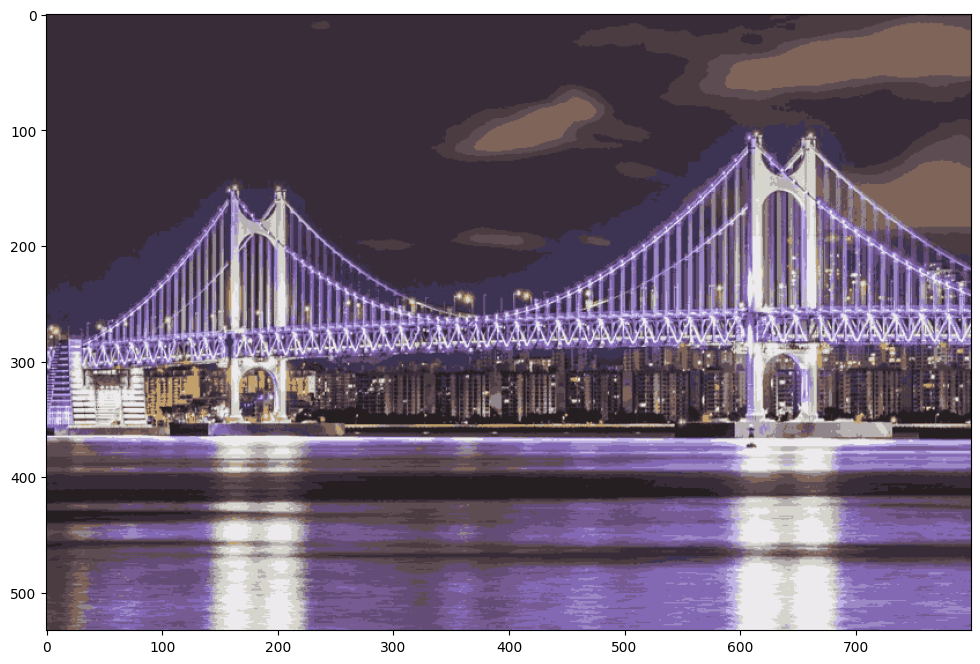

In [46]:
plt.figure(figsize=(15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)
(150, 4)


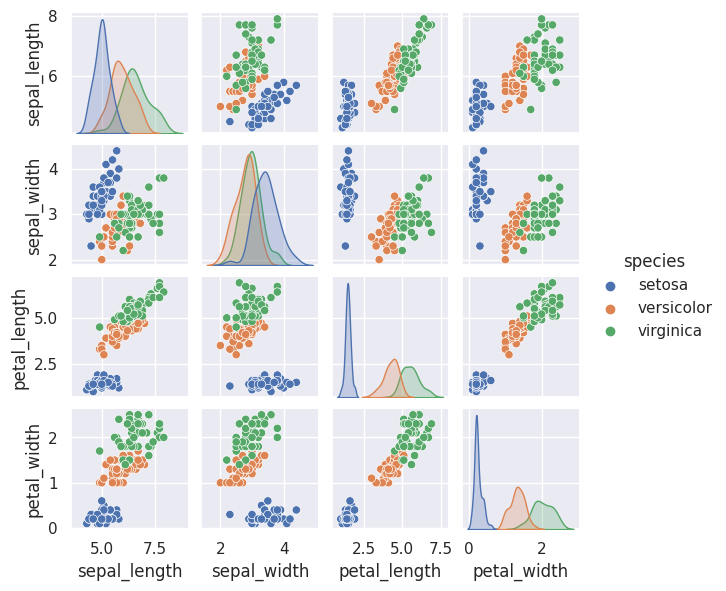

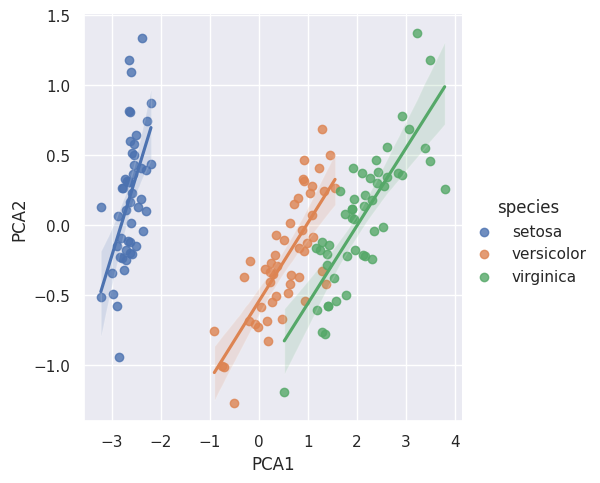

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
iris=sns.load_dataset('iris')
print(iris.head())
print(iris.shape) # 150 x 5 (4개의 독립, 1개의 종속: species)
sns.pairplot(iris,hue='species',height=1.5) # 상관도
X_iris=iris.iloc[:,:4]
from sklearn.decomposition import PCA
model=PCA(n_components=4)
model.fit(X_iris)
X_2D=model.transform(X_iris) # 150x4
print(X_2D.shape)
iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]
sns.lmplot(x='PCA1',y='PCA2',hue='species',data=iris,fit_reg=True)
plt.show()

In [50]:
import numpy as np
np.random.seed(4)
m=60 # 데이터 개수
w1,w2=0.1,0.3
noise=0.1
angles=np.random.rand(m)*3*np.pi/2-0.5
X=np.empty((m,3))
X[:,0]=np.cos(angles)+np.sin(angles)/2+noise*np.random.randn(m)/2
X[:,1]=np.sin(angles)*0.7+noise*np.random.randn(m)/2
X[:,2]=X[:,0]*w1+X[:,1]*w2+noise*np.random.randn(m)
print('X.shape : ',X.shape)

X.shape :  (60, 3)


In [51]:
import pandas as pd
df=pd.DataFrame(X,columns=['$X_1$','$X_2$','$X_3$'])
df.head(10)

,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


In [52]:
X.mean(axis=0)

array([0.02406745, 0.20932515, 0.07155422])

In [ ]:
X_cen=X-X.mean(axis=0)
X_cen

In [54]:
np.dot(X_cen.T,X_cen)

array([[41.18958451, 10.40791818,  7.16137913],
       [10.40791818, 10.63018922,  4.27963197],
       [ 7.16137913,  4.27963197,  2.68590523]])

In [55]:
# 공분산 행렬
X_cov=np.dot(X_cen.T,X_cen)/59
print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [56]:
np.cov(X_cen.T)

array([[0.69812855, 0.17640539, 0.12137931],
       [0.17640539, 0.1801727 , 0.07253614],
       [0.12137931, 0.07253614, 0.04552382]])

In [57]:
w,v=np.linalg.eig(X_cov) # 고유값분해

print('eigenvalue : ',w) # 고유치
print('eigenvector : \n',v) # 고유벡터

eigenvalue :  [0.77830975 0.1351726  0.01034272]
eigenvector : 
 [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [58]:
print('설명력 : ',w/w.sum())

설명력 :  [0.84248607 0.14631839 0.01119554]


In [60]:
U,D,V_t=np.linalg.svd(X_cen)
print(U.shape,D.shape,V_t.shape)
print(D)

(60, 60) (3,) (3, 3)
[6.77645005 2.82403671 0.78116597]


In [61]:
print('explained variance ratio : ',D**2/np.sum(D**2))

explained variance ratio :  [0.84248607 0.14631839 0.01119554]


In [62]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [63]:
print('singular value : ',pca.singular_values_)
print('singular vector :\n',pca.components_.T)

singular value :  [6.77645005 2.82403671 0.78116597]
singular vector :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


In [64]:
print('eigen value: ',pca.explained_variance_)
print('explained variance ratio: ',pca.explained_variance_ratio_)

eigen value:  [0.77830975 0.1351726  0.01034272]
explained variance ratio:  [0.84248607 0.14631839 0.01119554]


In [66]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d=np.argmax(cumsum>=0.95)+1
print('선택할 차원 수 :',d)

[0.84248607 0.98880446 1.        ]
선택할 차원 수 : 2


In [67]:
pca=PCA(n_components=0.95) # 변수선
X_proj=pca.fit_transform(X)
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

In [68]:
# keras + tenserflow(신경망 layer추가)
import tensorflow as tf
tf.__version__

'2.12.0'

In [73]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
(train_x,train_y),(test_x,test_y)=mnist.load_data() # 28x28 흑백이미지

In [74]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [75]:
train_x=train_x.reshape(-1,28*28)
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(train_x)

In [76]:
print(pca.n_components_) # 784 -> 154

154


In [77]:
X_reduced.shape

(60000, 154)

In [78]:
pca.components_.shape

(154, 784)

In [80]:
train_x.shape

(60000, 784)

In [79]:
(train_x @ pca.components_.T).shape

(60000, 154)

In [81]:
# 문제
# X_reduced 154개의 특징으로 추출된 데이터를 원래 이미지 사이즈로 복원해보시오

X_recovered = pca.inverse_transform(X_reduced)

X_recovered.shape

(60000, 784)

In [82]:
X_reduced @ pca.components_

array([[ 2.64687454e-14, -5.81302016e-13, -1.79499509e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64609603e-15, -1.67996410e-13, -5.11041518e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.28377776e-15,  8.10470042e-14, -9.30589413e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.88183138e-15, -1.81564119e-13,  6.04953780e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.07364675e-16,  4.46563152e-14, -5.45605406e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.73667409e-15,  2.11325954e-14,  1.25009063e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
X_reduced @ pca.components_ # 원래 이미지를 복원

In [86]:
# 변동 이미지 사이즈에 대해 한행에 5개씩 분리해서 넣는 과정 
import matplotlib
def plot_digits(instances,images_per_row=5,**options):
  size=28
  images_per_row=min(len(instances),images_per_row) # 5장 이하가 되는 것을 체크
  images=[instance.reshape(size,size) for instance in instances] # 원래의 이미지 상태로 복원
  n_rows=(len(instances)-1)//images_per_row +1 # 행을 결정 
  row_images=[] # 5장의 이미지를 묶어서 한장으로 만드는 것
  n_empty=n_rows*images_per_row - len(instances) # 전체 이미지 사이즈에 해당되는 빈공
  images.append(np.zeros((size,size*n_empty)))
  for row in range(n_rows):
    rimages=images[row*images_per_row : (row+1)*images_per_row]
    row_images.append(np.concatenate(rimages,axis=1)) # 한 행의 이미지
  image=np.concatenate(row_images,axis=0)
  plt.imshow(image,cmap=matplotlib.cm.binary,**options) # 이미지를 한장을 찍음
  plt.axis('off')

In [88]:
60000/2100 # => 약 29

28.571428571428573

Text(0.5, 1.0, 'no noise')

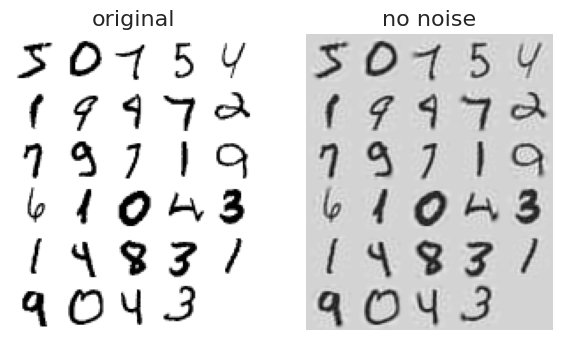

In [87]:
import numpy as np
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title('original',fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title('no noise',fontsize=16)

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)    

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T    
    print("이미지차원", data.shape)  # 288 x72
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (400, 100)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1784, 2)
원래이미지의 차수  (400, 100)


<ipython-input-90-c17d40794dbd>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize=dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',5))


(-0.19972965643412033,
 4.195346643588747,
 0.02244321091604335,
 0.990457146590137)

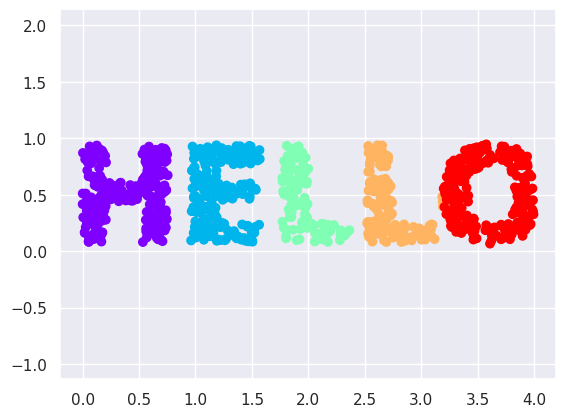

In [90]:
X=make_hello(1000)
colorize=dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',5))

plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.507487053249943, 8.845503039218586, 4.991879306174322, 7.269254509788998)

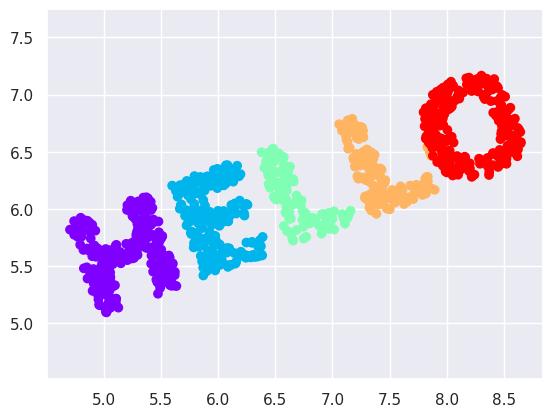

In [92]:
print(X.shape)
def rotate(X,angle):
  theta=np.deg2rad(angle)
  R=[[np.cos(theta),np.sin(theta)],
     [-np.sin(theta),np.cos(theta)]]
  print(type(R))
  return np.dot(X,R)
X2=rotate(X,20)+5
plt.scatter(X2[:,0],X2[:,1],**colorize)
plt.axis('equal')

In [ ]:
# 데이터에 대하여 선형변환 : MRS하면 원래 모양이 유지(거리값이 유지가 됨)

In [94]:
# 특별한 행렬 : 공분산 행렬, 상관계수행렬, 거리행렬
# 정방행렬이면서 대칭행렬인 경우 전치행렬이 역행렬이다 
from sklearn.metrics import pairwise_distances
D=pairwise_distances(X)
print(D.shape)
D[:5,:5]

(1000, 1000)


array([[0.        , 0.09456459, 0.45411046, 0.11688862, 0.25021892],
       [0.09456459, 0.        , 0.35954588, 0.21138485, 0.34459142],
       [0.45411046, 0.35954588, 0.        , 0.57087538, 0.70387239],
       [0.11688862, 0.21138485, 0.57087538, 0.        , 0.13339179],
       [0.25021892, 0.34459142, 0.70387239, 0.13339179, 0.        ]])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.0314683289212114,
 2.139050090753283,
 -1.3432561900442945,
 1.3682556159800603)

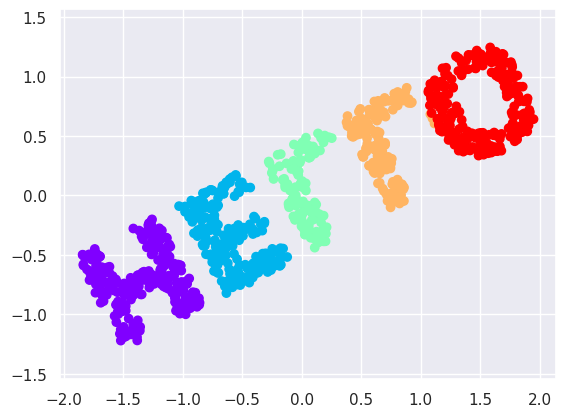

In [95]:
from sklearn.manifold import MDS
model=MDS(n_components=2,dissimilarity='precomputed',random_state=1)
out=model.fit_transform(D) # inverse_transform이 없음
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')

In [96]:
import numpy as np
rng=np.random.RandomState(10)
C=rng.randn(3,3)
print(np.dot(C,C.T))

e,V=np.linalg.eigh(np.dot(C,C.T))
print('eigenvector',V)
print('eigenvalue',e)

print(np.dot(V[0],V[1]))     # 행으로 행렬곱 
print(np.dot(V[:,0],V[:,1])) # 열로 행렬곱

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]
5.551115123125783e-17
-8.326672684688674e-17


In [98]:
# 행렬 @ 역행렬 => 단위행렬
V@V.T # V.T : V의 전치행렬이자 역행렬

array([[ 1.00000000e+00,  5.68030769e-17,  6.46648563e-17],
       [ 5.68030769e-17,  1.00000000e+00, -9.68146795e-17],
       [ 6.46648563e-17, -9.68146795e-17,  1.00000000e+00]])

In [99]:
V@np.linalg.inv(V)

array([[ 1.00000000e+00, -4.40491859e-17,  1.08487117e-17],
       [-5.49542318e-17,  1.00000000e+00, -5.48320167e-18],
       [-1.70465154e-17,  2.84742496e-17,  1.00000000e+00]])

In [100]:
# 다차원으로 랜덤한 수를 이용해서 축을 만든다음 변환
# hello는 2차원 데이터
def random_projection(X,dimension=3,rseed=42):
  assert dimension >=X.shape[1]
  rng=np.random.RandomState(rseed)
  C=rng.randn(dimension,dimension)
  print('C는',C.shape)
  print(np.dot(C,C.T)) # 정방행렬이면서 대칭행렬 
  e,V=np.linalg.eigh(np.dot(C,C.T)) # 고유값 고유벡터
  print('V는',V.shape)
  print('차원은',V[:X.shape[1]])
  # 2x3
  return np.dot(X,V[:X.shape[1]])

print(X.shape)
print(X.shape[1])
print('데이터의 차원은',X.shape)
X3=random_projection(X,3)
X3.shape

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

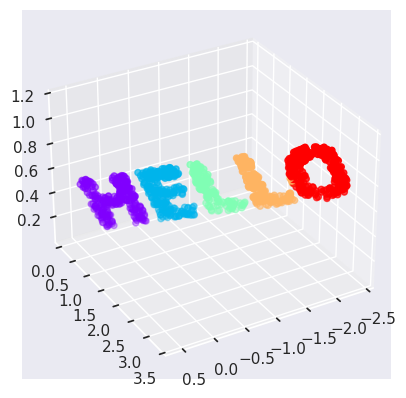

In [101]:
# 3차원으로 변환
from mpl_toolkits import mplot3d
ax=plt.axes(projection='3d')
ax.scatter3D(X3[:,0],X3[:,1],X3[:,2],**colorize)
ax.view_init(azim=60,elev=30)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-2.0314683289212114,
 2.1390500907532832,
 -1.3432561900442952,
 1.3682556159800632)

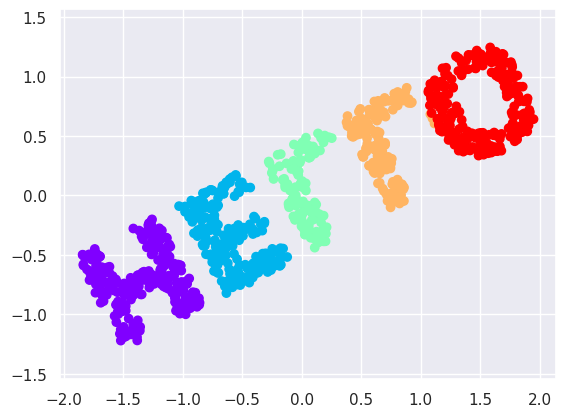

In [102]:
#원래의 거리값을 유지함
model=MDS(n_components=2,random_state=1)
out3=model.fit_transform(X3)
plt.scatter(out3[:,0],out3[:,1],**colorize)
plt.axis('equal')

In [104]:
def make_hello_s_curve(X):
  t=(X[:,0]-2)*0.75*np.pi
  x=np.sin(t)
  y=X[:,1]
  z=np.sign(t)*(np.cos(t)-1)
  print('z값',np.ptp(x))
  print('x값',np.ptp(y))
  print('y값',np.ptp(z))
  return np.vstack((x,y,z)).T

XS=make_hello_s_curve(X)

z값 1.9999961272919269
x값 0.8800126687946306
y값 3.999970622756973


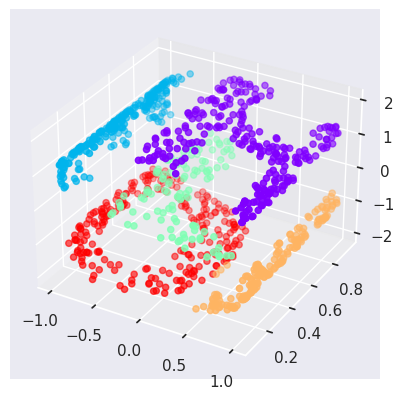

In [106]:
ax=plt.axes(projection='3d')
ax.scatter3D(XS[:,0],XS[:,1],XS[:,2],**colorize)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(-1.7542649693704555,
 1.7171533174441027,
 -2.253133416776031,
 2.0016781872998273)

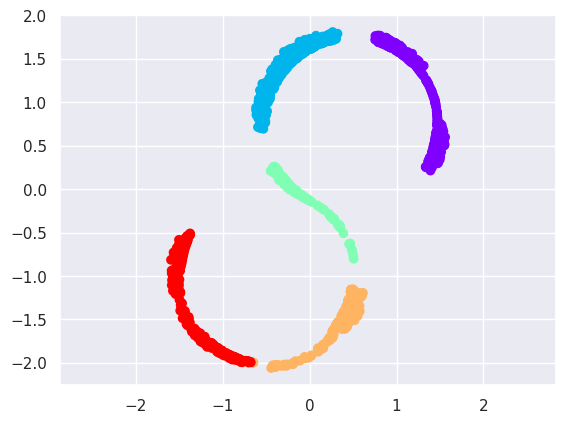

In [107]:
# 비선형변환을 MDS하면 원래의 거리를 유지하지 못한다
model=MDS(n_components=2,random_state=2)
outS=model.fit_transform(XS)
plt.scatter(outS[:,0],outS[:,1],**colorize)
plt.axis('equal')

(0.15, -0.15)

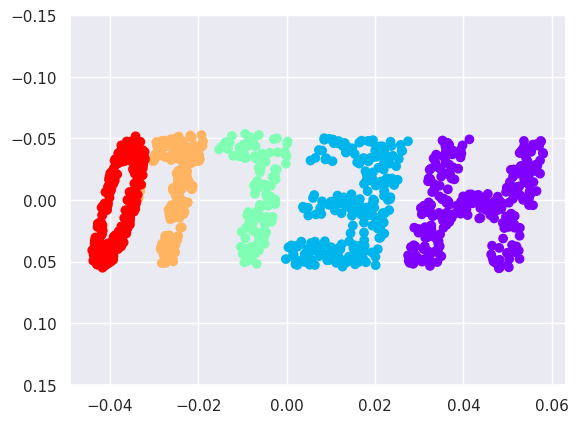

In [108]:
# LLE (Locally Linear Embedding) 비 선형 데이터에 강건하다
from sklearn.manifold import LocallyLinearEmbedding
model=LocallyLinearEmbedding(n_neighbors=100,n_components=2,method='modified',eigen_solver='dense')
out=model.fit_transform(XS)
fig,ax=plt.subplots()
ax.scatter(out[:,0],out[:,1],**colorize)
ax.set_ylim(0.15,-0.15)